In [61]:
%matplotlib inline

import numpy as np
from scipy.misc import lena
from theano import tensor as T, function
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D

# Input image and filter

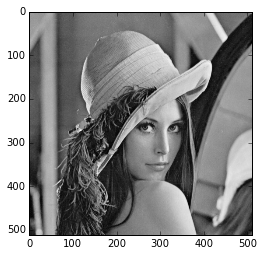

In [14]:
img = lena()
plt.imshow(img, cmap='gray')

I = img.reshape((1, 1, img.shape[0], img.shape[1]))

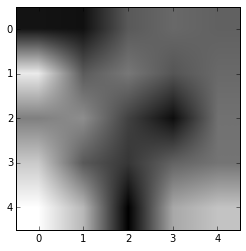

In [59]:
"""
# Try a border detection filter
w = [[0., 0., 0., 0., 0.],
     [0., 0., -1., 0., 0.],
     [0., -1., 4., -1., 0.],
     [0., 0., -1., 0., 0.],
     [0., 0., 0., 0., 0.]]
w = np.asarray(w).reshape((1, 1, 5, 5)) # dimensions: (input channels, output channels, rows, columns)
"""

w = np.random.randn(1, 1, 5, 5) # try a random filter

plt.imshow(w[0, 0], cmap='gray')

# Theano convolution

In [46]:
X, W = T.tensor4s('X', 'W')
Y = T.nnet.conv.conv2d(X, W,
        border_mode='valid',
        image_shape=I[:1].shape,
        filter_shape=w.shape)
F = function([X, W], Y, allow_input_downcast=True)

In [47]:
I.shape

(1, 1, 512, 512)

(1, 1, 508, 508)


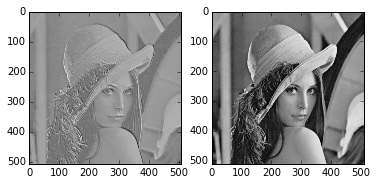

In [60]:
out = F(I, w)

print(out.shape)

plt.subplot(121)
plt.imshow(out[0, 0], cmap='gray')
plt.subplot(122)
plt.imshow(img, cmap='gray')

# Keras convolution

In [65]:
nb_output_chan = 1
nb_rows = 5
nb_cols = 5
pool_row = 8
pool_col = 8

model = Sequential()
model.add(Convolution2D(nb_output_chan, nb_rows, nb_cols,
                        border_mode='valid',
                        input_shape=I.shape[1:]))
model.add(MaxPooling2D(pool_size=(pool_row, pool_col)))

model.compile(loss='mse', optimizer='sgd')

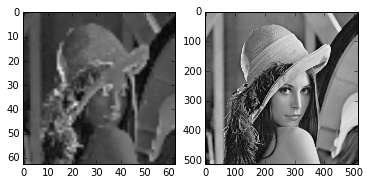

In [66]:
out = model.predict(I)

plt.subplot(121)
plt.imshow(out[0, 0], cmap='gray')
plt.subplot(122)
plt.imshow(img, cmap='gray')